In [68]:
import pandas as pd
import time
import skimage
from skimage import io
from skimage import filters
from skimage import feature
from skimage import morphology
from skimage import measure
from skimage import exposure
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import ndimage as ndi
import numpy as np
#import cv2
import pathlib as plb
import csv
import seaborn as sns

In [69]:
current_dir = plb.Path('/Users/emilyfryer/Documents/Current_analysis')
man_results_dir = current_dir.joinpath('manual_results')
auto_results_dir = current_dir.joinpath('automated_results')

prefix = input('Prefix: ')
well_id = input('Well ID: ')
plate_id = input('Plate ID: ')
slot_id = input('Slot ID: ')      

Prefix: SUG_20200724
Well ID: P
Plate ID: 02
Slot ID: 2


In [70]:
manual_file = man_results_dir.joinpath(prefix + '_' + plate_id + '_' + well_id.upper() + '.csv')
auto_file = auto_results_dir.joinpath(prefix + '_fin001_' + plate_id + '_' + well_id.upper() + '_automatedCounts.csv')

manual_dat = pd.read_csv(manual_file)

auto_dat = pd.read_csv(auto_file)
auto_dat = auto_dat.astype(int)

In [71]:
print(min(manual_dat['Y']))

126


In [72]:
manual_dat['X'] = manual_dat['X']

In [73]:
manual_dat['X_Y'] = manual_dat[['X', 'Y']].apply(tuple, axis=1)
manual_dat.head()

,,X,Y,X_Y
0,1,516,796,"(516, 796)"
1,2,1104,736,"(1104, 736)"
2,3,812,366,"(812, 366)"
3,4,1650,730,"(1650, 730)"
4,5,1606,922,"(1606, 922)"


In [74]:
#auto_dat['X'] = auto_dat['X'] + 100
auto_dat['X_Y'] = auto_dat[['X', 'Y']].apply(tuple, axis=1)

In [75]:
auto_list = auto_dat['X_Y'].tolist()
man_list = manual_dat['X_Y'].tolist()

In [76]:
cop_man_list = man_list.copy()
cop_auto_list = auto_list.copy()

In [77]:
def under_manVauto(auto_ID_worms, manual_ID_worms):
    u_compared = []
    buffer = 20
    under = auto_ID_worms.copy()

    for i in manual_ID_worms:
        for j in under:
            difference = abs(np.subtract(j, i))
            
            if difference[0] < buffer and difference[1] < buffer:
                #print(difference)
                u_compared.append(i)
                under.remove(j)
    #print('Compared: ' + str(len(compared)))
    return u_compared, under

In [78]:
u_matches, test_u = under_manVauto(cop_auto_list, cop_man_list)

In [79]:
print(len(auto_dat))
print(len(manual_dat))
print(len(u_matches))
print(len(test_u))

136
140
117
19


In [80]:
under_X = [x[0] for x in test_u]
under_Y = [x[1] for x in test_u]
u_matches_X= [x[0] for x in u_matches]
u_matches_Y = [x[1] for x in u_matches]

In [81]:
def over_manVauto(auto_ID_worms, manual_ID_worms):
    o_compared = []
    buffer = 20
    over = manual_ID_worms.copy()

    for i in auto_ID_worms:
        for j in over:
            difference = abs(np.subtract(i,j))
            
            if difference[0] < buffer and difference[1] < buffer:
                #print(difference)
                o_compared.append(i)
                over.remove(j)
    #print('Compared: ' + str(len(compared)))
    return o_compared, over

In [82]:
o_matches, o_test = over_manVauto(cop_auto_list, cop_man_list)


In [83]:
print(len(o_matches))
print(len(o_test))

117
23


In [84]:
over_X = [x[0] for x in o_test]
over_Y = [x[1] for x in o_test]
o_matches_X= [x[0] for x in o_matches]
o_matches_Y = [x[1] for x in o_matches]

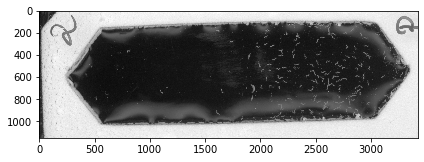

In [85]:
image_location = plb.Path('/Users/emilyfryer/Documents/Current_analysis/Images/indy_wells')
fin_file = image_location.joinpath('20200724_02_P.tif')
fin_img = skimage.io.imread(fin_file)

io.imshow(fin_img)

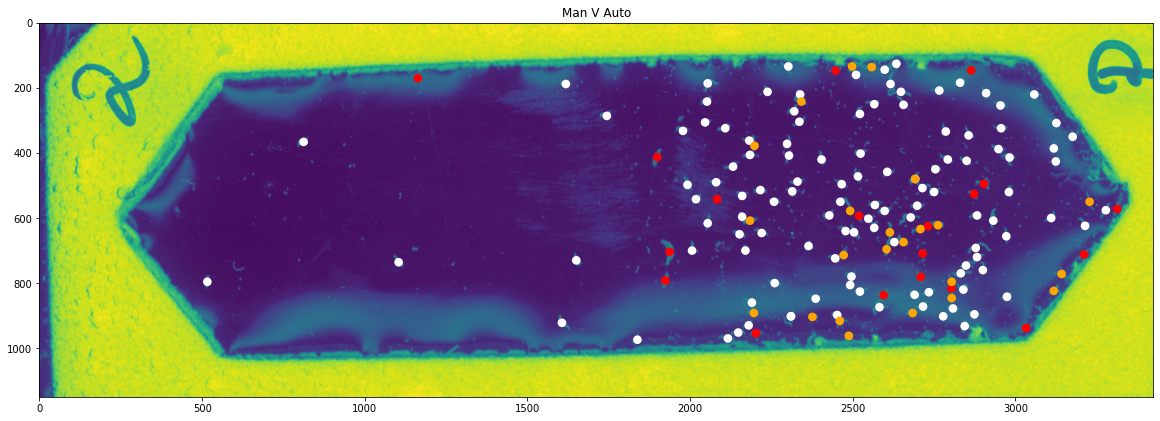

In [86]:
fig, axes = plt.subplots(figsize=(16, 8), constrained_layout=True)
axes.imshow(fin_img)#[y_min:y_max, x_min:x_max])
axes.set_title('Man V Auto')


sns.scatterplot(x=u_matches_X, y=u_matches_Y, ax=axes, color= 'white',s = 75 , edgecolor="none")
sns.scatterplot(x=under_X, y=under_Y, ax=axes, color = 'red', edgecolor="none", s = 75,legend=False )
sns.scatterplot(x=over_X, y=over_Y, ax=axes, color = 'orange',  edgecolor="none", s = 75,legend=False)
#sns.scatterplot(x=manual_dat['X'], y=manual_dat['Y'], ax=axes, color='blue', size=.75, legend=False)
fig.savefig('/Users/emilyfryer/Documents/Current_analysis/repulsion_fig.jpg')

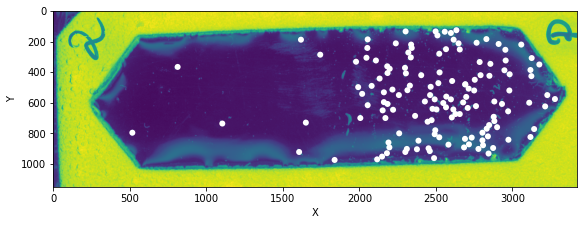

In [25]:
fig, axes = plt.subplots(figsize=(8, 16), constrained_layout=True)
axes.imshow(fin_img)

#sns.scatterplot(x='X', y='Y', ax=axes, data=auto_dat, color='red', edgecolor='none', legend=False )

sns.scatterplot(x='X', y='Y', ax=axes, data=manual_dat, color='white',edgecolor='none', legend=False )

#sns.scatterplot(x=remain_X, y=remain_Y, ax=axes, marker='X', color='yellow', size=.5, legend=False)



Text(0.5, 1.0, 'Man V Auto')

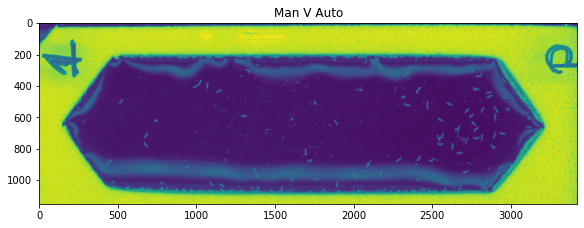

In [170]:
fig, axes = plt.subplots(figsize=(8, 16), constrained_layout=True)
axes.imshow(fin_img)#[y_min:y_max, x_min:x_max])
axes.set_title('Man V Auto')


#sns.scatterplot(x=remain_X, y=remain_Y, ax=axes, marker='X', color='red')